## Carvana Challenge

In [1]:
#Importing relavent libraries
import pandas as pd
import numpy as np
import re

In [2]:
#Importing current inventory data
current_inventory = pd.read_excel('Inventory_Current_Onsite.xlsx')
#Changing data type for the column 'Year'
current_inventory['Year'] = current_inventory['Year'].astype(str)
current_inventory

,Make,Model,Year,CurrentOnsiteInventory
0,Toyota,Camry,2013,176
1,Kia,Soul,2013,92
2,Honda,Civic,2013,113
3,Toyota,Corolla,2013,72
4,Hyundai,Elantra,2013,77
...,...,...,...,...
110,Kia,Forte,2015,5
111,Nissan,LEAF,2015,3
112,GMC,Acadia,2011,6
113,Kia,Forte,2011,6


In [3]:
#Importing historical inventory data
historical_inventory = pd.read_excel('Inventory_Historical.xlsx')
#Removing an empty column 
historical_inventory.drop(historical_inventory.columns[[4]], axis=1, inplace=True)
#Changing data type of column 'Year'
historical_inventory['Year'] = historical_inventory['Year'].astype(str)
historical_inventory

,Make,Model,Year,HistAvgInv
0,Toyota,Camry,2013,143
1,Kia,Soul,2013,140
2,Honda,Civic,2013,124
3,Toyota,Corolla,2013,120
4,Hyundai,Elantra,2013,114
...,...,...,...,...
110,Kia,Forte,2015,7
111,Nissan,LEAF,2015,6
112,GMC,Acadia,2011,7
113,Kia,Forte,2011,6


In [4]:
#Importing Keyword attributes data
kw_attributes = pd.read_excel('KW_Attributes.xlsx')
kw_attributes

,Campaign,Ad group,Keyword,KW ID,Match type,Quality score,Est First Pos. Bid,Est Top of Page Bid
0,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry,371462857,Broad,10,9.979746,8.316455
1,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_14,+2014 +toyota +camry +for +sale,540282177,Broad,10,11.620050,9.683375
2,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_15,+2015 +toyota +camry +for +sale,518188218,Broad,9,8.635562,7.196302
3,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Kia-MO_Soul-YR_15,+2015 +kia +soul,698853859,Broad,10,10.979037,9.149198
4,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_13,+toyota +camry +2013,534068489,Broad,7,10.474498,5.844252
...,...,...,...,...,...,...,...,...
3445,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Toyota-MO_Prius-YR_15,+2015 +toyota +prius +for +sale,193408385,Broad,3,11.025667,2.482643
3446,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Toyota-MO_Prius-YR_15,2015 toyota prius,322574626,Exact,4,11.734692,9.778910
3447,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Toyota-MO_Prius-YR_15,toyota prius 2015,849508696,Exact,7,6.203357,2.831516
3448,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Toyota-MO_Prius-YR_15,+toyota +prius +2015,836776515,Broad,8,10.928894,9.107412


In [5]:
#Importing Keyword performance data
kw_performance = pd.read_excel('KW_Performance_L120D.XLSX')
kw_performance

,KW ID,Impressions,Clicks,Cost,Conversions
0,371462857,10650,1540,5798.319872,22
1,540282177,44350,560,1383.842480,17
2,518188218,38840,870,2930.030504,9
3,698853859,40470,340,676.402686,8
4,534068489,32940,520,2872.377114,43
...,...,...,...,...,...
3445,193408385,36130,510,4543.904885,0
3446,322574626,32100,210,1241.448150,0
3447,849508696,17300,1250,5379.815484,0
3448,836776515,27000,800,2609.331149,0


In [6]:
#Importing Average revenue sales data
make_model_ars = pd.read_excel('Make_Model_ARS.xlsx')
make_model_ars

,Make Model,Make,Model,ARS
0,Toyota Camry,Toyota,Camry,930.517547
1,Kia Soul,Kia,Soul,975.778126
2,Honda Civic,Honda,Civic,1120.123183
3,Toyota Corolla,Toyota,Corolla,861.917229
4,Hyundai Elantra,Hyundai,Elantra,959.873535
5,Ford Fusion,Ford,Fusion,1060.953889
6,GMC Terrain,GMC,Terrain,1077.603723
7,Toyota Prius,Toyota,Prius,1088.587793
8,Honda Accord,Honda,Accord,913.153110
9,Hyundai Sonata,Hyundai,Sonata,1004.281070


In [7]:
#Checking for nulls
kw_attributes.isnull().sum()

Campaign               0
Ad group               0
Keyword                0
KW ID                  0
Match type             0
Quality score          0
Est First Pos. Bid     0
Est Top of Page Bid    0
dtype: int64

In [8]:
#Checking for column data types 
kw_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign             3450 non-null   object 
 1   Ad group             3450 non-null   object 
 2   Keyword              3450 non-null   object 
 3   KW ID                3450 non-null   int64  
 4   Match type           3450 non-null   object 
 5   Quality score        3450 non-null   int64  
 6   Est First Pos. Bid   3450 non-null   float64
 7   Est Top of Page Bid  3450 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 215.8+ KB


### Extracting Make, Model, Year and Market

In [9]:
#Extracting year from 'Keyword' column using regular expressions
kw_attributes['Year'] =  kw_attributes['Keyword'].str.extract(r'(\d+)')
kw_attributes['Year']

0       2012
1       2014
2       2015
3       2015
4       2013
        ... 
3445    2015
3446    2015
3447    2015
3448    2015
3449    2015
Name: Year, Length: 3450, dtype: object

In [10]:
#Extracting 'Make' from 'Keyword' column using regular expressions
#Creating a list of Make values 
make_list = make_model_ars['Make'].str.lower().tolist()
#Extracting values from keywords against the Make value list 
kw_attributes['Make'] = kw_attributes['Keyword'].str.extract(f"({'|'.join(make_list)})")
#kw_attributes[kw_attributes['Keyword'].isin(make_list)]
#Making adjustments to capitalizations 
kw_attributes['Make'] = kw_attributes['Make'].apply(lambda x: x.upper() if x == 'gmc' else x.capitalize())
kw_attributes['Make'].value_counts()

Kia          600
Chevrolet    600
Honda        450
Toyota       450
Hyundai      300
Nissan       300
GMC          300
Cadillac     150
Buick        150
Ford         150
Name: Make, dtype: int64

In [11]:
#Extracting 'Model' from 'Keyword' column using regular expressions
#Creating a list of Model values 
model_list = make_model_ars['Model'].str.lower().tolist()
#Extracting values from keywords against the Model value list
kw_attributes['Model'] = kw_attributes['Keyword'].str.extract(f"({'|'.join(model_list)})")
#Making adjustments to capitalizations
kw_attributes['Model'] = kw_attributes['Model'].apply(lambda x: x.upper() if x in ['crv', 'leaf', 'srx'] else x.capitalize())
kw_attributes['Model'].value_counts()

Sonata     150
Sorento    150
LEAF       150
Civic      150
Terrain    150
Acadia     150
Fusion     150
Forte      150
Elantra    150
Prius      150
CRV        150
Camaro     150
Camry      150
Equinox    150
Altima     150
Soul       150
SRX        150
Optima     150
Verano     150
Accord     150
Volt       150
Corolla    150
Cruze      150
Name: Model, dtype: int64

In [12]:
#Extracting 'Market' from 'Campaign' column using regular expressions
kw_attributes['Market'] = kw_attributes['Campaign'].str.split('-', expand = True)[2]
kw_attributes[['Market']].value_counts()

Market
ATL       690
CHI       690
DAL       690
NYC       690
SFO       690
dtype: int64

### Merging the datasets

In [ ]:
#Merging all 5 datasets 
kw_attributes_performance = kw_attributes.merge(kw_performance, on = 'KW ID', how='inner')
kw_attributes_performance = kw_attributes_performance.merge(make_model_ars, on = ['Make', 'Model'], how='inner')
kw_attributes_performance = kw_attributes_performance.merge(current_inventory, on = ['Make', 'Model', 'Year'], how='inner')
kw_attributes_performance = kw_attributes_performance.merge(historical_inventory, on = ['Make', 'Model', 'Year'], how='inner')
kw_attributes_performance

### Aggregating at different levels

In [ ]:
#Aggregation of 'Conversions' and 'Clicks' at the Ad group level 
kw_attributes_performance = kw_attributes_performance.join(kw_attributes_performance.groupby(by='Ad group')[['Conversions', 'Clicks']].sum(), on='Ad group', rsuffix=' Ad Group')
kw_attributes_performance

,Campaign,Ad group,Keyword,KW ID,Match type,Quality score,Est First Pos. Bid,Est Top of Page Bid,Year,Make,...,Impressions,Clicks,Cost,Conversions,Make Model,ARS,CurrentOnsiteInventory,HistAvgInv,Conversions Ad Group,Clicks Ad Group
0,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry,371462857,Broad,10,9.979746,8.316455,2012,Toyota,...,10650,1540,5798.319872,22,Toyota Camry,930.517547,30,57,45,4230
1,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry +for +sale,484440977,Broad,4,10.086514,8.405428,2012,Toyota,...,26420,270,838.598719,11,Toyota Camry,930.517547,30,57,45,4230
2,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,toyota camry 2012,613695502,Exact,9,6.023169,5.019308,2012,Toyota,...,8950,1630,5373.093239,11,Toyota Camry,930.517547,30,57,35,5100
3,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,2012 toyota camry for sale,798338152,Exact,9,7.120567,3.648971,2012,Toyota,...,20590,1270,4433.641070,11,Toyota Camry,930.517547,30,57,35,5100
4,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry,361591776,Broad,5,9.309977,3.200374,2012,Toyota,...,25930,730,2744.550327,8,Toyota Camry,930.517547,30,57,35,5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,SRCH-I-NYC-TOTL,SRCH-I-NYC-MK_Nissan-MO_LEAF-YR_15,nissan leaf 2015,265355365,Exact,8,5.877861,4.898218,2015,Nissan,...,6010,350,2064.788510,0,Nissan LEAF,954.949008,3,6,0,2510
3446,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,+nissan +leaf +2015,651019364,Broad,3,11.115549,9.262957,2015,Nissan,...,26320,300,2601.105411,0,Nissan LEAF,954.949008,3,6,0,2840
3447,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,2015 nissan leaf,265194646,Exact,4,5.121817,4.225704,2015,Nissan,...,15860,80,296.651823,0,Nissan LEAF,954.949008,3,6,0,2840
3448,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,nissan leaf 2015,553635527,Exact,5,11.265699,9.388082,2015,Nissan,...,5950,410,1805.452085,0,Nissan LEAF,954.949008,3,6,0,2840


In [ ]:
#Aggregation of 'Conversions' and 'Clicks' at the Make/Model/Year level
kw_attributes_performance = kw_attributes_performance.join(kw_attributes_performance.groupby(by=['Make','Model','Year'])[['Conversions', 'Clicks']].sum(), on=['Make','Model','Year'], rsuffix=' Make/Model/Year')
kw_attributes_performance

,Campaign,Ad group,Keyword,KW ID,Match type,Quality score,Est First Pos. Bid,Est Top of Page Bid,Year,Make,...,Cost,Conversions,Make Model,ARS,CurrentOnsiteInventory,HistAvgInv,Conversions Ad Group,Clicks Ad Group,Conversions Make/Model/Year,Clicks Make/Model/Year
0,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry,371462857,Broad,10,9.979746,8.316455,2012,Toyota,...,5798.319872,22,Toyota Camry,930.517547,30,57,45,4230,119,26370
1,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry +for +sale,484440977,Broad,4,10.086514,8.405428,2012,Toyota,...,838.598719,11,Toyota Camry,930.517547,30,57,45,4230,119,26370
2,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,toyota camry 2012,613695502,Exact,9,6.023169,5.019308,2012,Toyota,...,5373.093239,11,Toyota Camry,930.517547,30,57,35,5100,119,26370
3,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,2012 toyota camry for sale,798338152,Exact,9,7.120567,3.648971,2012,Toyota,...,4433.641070,11,Toyota Camry,930.517547,30,57,35,5100,119,26370
4,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry,361591776,Broad,5,9.309977,3.200374,2012,Toyota,...,2744.550327,8,Toyota Camry,930.517547,30,57,35,5100,119,26370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,SRCH-I-NYC-TOTL,SRCH-I-NYC-MK_Nissan-MO_LEAF-YR_15,nissan leaf 2015,265355365,Exact,8,5.877861,4.898218,2015,Nissan,...,2064.788510,0,Nissan LEAF,954.949008,3,6,0,2510,0,12710
3446,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,+nissan +leaf +2015,651019364,Broad,3,11.115549,9.262957,2015,Nissan,...,2601.105411,0,Nissan LEAF,954.949008,3,6,0,2840,0,12710
3447,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,2015 nissan leaf,265194646,Exact,4,5.121817,4.225704,2015,Nissan,...,296.651823,0,Nissan LEAF,954.949008,3,6,0,2840,0,12710
3448,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,nissan leaf 2015,553635527,Exact,5,11.265699,9.388082,2015,Nissan,...,1805.452085,0,Nissan LEAF,954.949008,3,6,0,2840,0,12710


In [ ]:
#Aggregation of 'Conversions' and 'Clicks' at the Make/Model level
kw_attributes_performance = kw_attributes_performance.join(kw_attributes_performance.groupby(by=['Make','Model'])[['Conversions', 'Clicks']].sum(), on=['Make','Model'], rsuffix=' Make/Model')
kw_attributes_performance

,Campaign,Ad group,Keyword,KW ID,Match type,Quality score,Est First Pos. Bid,Est Top of Page Bid,Year,Make,...,Make Model,ARS,CurrentOnsiteInventory,HistAvgInv,Conversions Ad Group,Clicks Ad Group,Conversions Make/Model/Year,Clicks Make/Model/Year,Conversions Make/Model,Clicks Make/Model
0,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry,371462857,Broad,10,9.979746,8.316455,2012,Toyota,...,Toyota Camry,930.517547,30,57,45,4230,119,26370,622,136590
1,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry +for +sale,484440977,Broad,4,10.086514,8.405428,2012,Toyota,...,Toyota Camry,930.517547,30,57,45,4230,119,26370,622,136590
2,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,toyota camry 2012,613695502,Exact,9,6.023169,5.019308,2012,Toyota,...,Toyota Camry,930.517547,30,57,35,5100,119,26370,622,136590
3,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,2012 toyota camry for sale,798338152,Exact,9,7.120567,3.648971,2012,Toyota,...,Toyota Camry,930.517547,30,57,35,5100,119,26370,622,136590
4,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry,361591776,Broad,5,9.309977,3.200374,2012,Toyota,...,Toyota Camry,930.517547,30,57,35,5100,119,26370,622,136590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,SRCH-I-NYC-TOTL,SRCH-I-NYC-MK_Nissan-MO_LEAF-YR_15,nissan leaf 2015,265355365,Exact,8,5.877861,4.898218,2015,Nissan,...,Nissan LEAF,954.949008,3,6,0,2510,0,12710,65,53160
3446,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,+nissan +leaf +2015,651019364,Broad,3,11.115549,9.262957,2015,Nissan,...,Nissan LEAF,954.949008,3,6,0,2840,0,12710,65,53160
3447,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,2015 nissan leaf,265194646,Exact,4,5.121817,4.225704,2015,Nissan,...,Nissan LEAF,954.949008,3,6,0,2840,0,12710,65,53160
3448,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,nissan leaf 2015,553635527,Exact,5,11.265699,9.388082,2015,Nissan,...,Nissan LEAF,954.949008,3,6,0,2840,0,12710,65,53160


In [ ]:
#Aggregation of 'Conversions' and 'Clicks' at the Market level
kw_attributes_performance = kw_attributes_performance.join(kw_attributes_performance.groupby(by='Market')[['Conversions', 'Clicks']].sum(), on='Market', rsuffix=' Market')
kw_attributes_performance

,Campaign,Ad group,Keyword,KW ID,Match type,Quality score,Est First Pos. Bid,Est Top of Page Bid,Year,Make,...,CurrentOnsiteInventory,HistAvgInv,Conversions Ad Group,Clicks Ad Group,Conversions Make/Model/Year,Clicks Make/Model/Year,Conversions Make/Model,Clicks Make/Model,Conversions Market,Clicks Market
0,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry,371462857,Broad,10,9.979746,8.316455,2012,Toyota,...,30,57,45,4230,119,26370,622,136590,1759,362330
1,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry +for +sale,484440977,Broad,4,10.086514,8.405428,2012,Toyota,...,30,57,45,4230,119,26370,622,136590,1759,362330
2,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,toyota camry 2012,613695502,Exact,9,6.023169,5.019308,2012,Toyota,...,30,57,35,5100,119,26370,622,136590,1457,378230
3,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,2012 toyota camry for sale,798338152,Exact,9,7.120567,3.648971,2012,Toyota,...,30,57,35,5100,119,26370,622,136590,1457,378230
4,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry,361591776,Broad,5,9.309977,3.200374,2012,Toyota,...,30,57,35,5100,119,26370,622,136590,1457,378230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,SRCH-I-NYC-TOTL,SRCH-I-NYC-MK_Nissan-MO_LEAF-YR_15,nissan leaf 2015,265355365,Exact,8,5.877861,4.898218,2015,Nissan,...,3,6,0,2510,0,12710,65,53160,909,360000
3446,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,+nissan +leaf +2015,651019364,Broad,3,11.115549,9.262957,2015,Nissan,...,3,6,0,2840,0,12710,65,53160,297,379000
3447,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,2015 nissan leaf,265194646,Exact,4,5.121817,4.225704,2015,Nissan,...,3,6,0,2840,0,12710,65,53160,297,379000
3448,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,nissan leaf 2015,553635527,Exact,5,11.265699,9.388082,2015,Nissan,...,3,6,0,2840,0,12710,65,53160,297,379000


### Conversion rates

In [ ]:
#Calculating the conversion rates for different level of aggregations
kw_attributes_performance['Keyword CVR'] = kw_attributes_performance['Conversions']/kw_attributes_performance['Clicks']
kw_attributes_performance['Ad Group CVR'] = kw_attributes_performance['Conversions Ad Group']/kw_attributes_performance['Clicks Ad Group']
kw_attributes_performance['Make/Model/Year CVR'] = kw_attributes_performance['Conversions Make/Model/Year']/kw_attributes_performance['Clicks Make/Model/Year']
kw_attributes_performance['Make/Model CVR'] = kw_attributes_performance['Conversions Make/Model']/kw_attributes_performance['Clicks Make/Model']
kw_attributes_performance['Market CVR'] = kw_attributes_performance['Conversions Market']/kw_attributes_performance['Clicks Market']
kw_attributes_performance

,Campaign,Ad group,Keyword,KW ID,Match type,Quality score,Est First Pos. Bid,Est Top of Page Bid,Year,Make,...,Clicks Make/Model/Year,Conversions Make/Model,Clicks Make/Model,Conversions Market,Clicks Market,Keyword CVR,Ad Group CVR,Make/Model/Year CVR,Make/Model CVR,Market CVR
0,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry,371462857,Broad,10,9.979746,8.316455,2012,Toyota,...,26370,622,136590,1759,362330,0.014286,0.010638,0.004513,0.004554,0.004855
1,SRCH-I-ATL-TOTL,SRCH-I-ATL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry +for +sale,484440977,Broad,4,10.086514,8.405428,2012,Toyota,...,26370,622,136590,1759,362330,0.040741,0.010638,0.004513,0.004554,0.004855
2,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,toyota camry 2012,613695502,Exact,9,6.023169,5.019308,2012,Toyota,...,26370,622,136590,1457,378230,0.006748,0.006863,0.004513,0.004554,0.003852
3,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,2012 toyota camry for sale,798338152,Exact,9,7.120567,3.648971,2012,Toyota,...,26370,622,136590,1457,378230,0.008661,0.006863,0.004513,0.004554,0.003852
4,SRCH-I-DAL-TOTL,SRCH-I-DAL-MK_Toyota-MO_Camry-YR_12,+2012 +toyota +camry,361591776,Broad,5,9.309977,3.200374,2012,Toyota,...,26370,622,136590,1457,378230,0.010959,0.006863,0.004513,0.004554,0.003852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,SRCH-I-NYC-TOTL,SRCH-I-NYC-MK_Nissan-MO_LEAF-YR_15,nissan leaf 2015,265355365,Exact,8,5.877861,4.898218,2015,Nissan,...,12710,65,53160,909,360000,0.000000,0.000000,0.000000,0.001223,0.002525
3446,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,+nissan +leaf +2015,651019364,Broad,3,11.115549,9.262957,2015,Nissan,...,12710,65,53160,297,379000,0.000000,0.000000,0.000000,0.001223,0.000784
3447,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,2015 nissan leaf,265194646,Exact,4,5.121817,4.225704,2015,Nissan,...,12710,65,53160,297,379000,0.000000,0.000000,0.000000,0.001223,0.000784
3448,SRCH-I-SFO-TOTL,SRCH-I-SFO-MK_Nissan-MO_LEAF-YR_15,nissan leaf 2015,553635527,Exact,5,11.265699,9.388082,2015,Nissan,...,12710,65,53160,297,379000,0.000000,0.000000,0.000000,0.001223,0.000784


### Initial bid for each keyword based on historical performance

In [ ]:
#Claculating initial bids
kw_attributes_performance.loc[kw_attributes_performance['Conversions'] > 10, 'New Keyword Bid'] = kw_attributes_performance['Keyword CVR']*kw_attributes_performance['ARS']
#If Keyword has less than 11 conversions but Ad group has more than 10 conversions
kw_attributes_performance.loc[(kw_attributes_performance['Conversions'] < 11) & (kw_attributes_performance['Conversions Ad Group'] > 10), 'New Keyword Bid'] = kw_attributes_performance['Ad Group CVR']*kw_attributes_performance['ARS']
#If Ad group has has less than 11 conversions, but Mk/Mo/Yr has more than 10 conversions
kw_attributes_performance.loc[(kw_attributes_performance['Conversions Ad Group'] < 11) & (kw_attributes_performance['Conversions Make/Model/Year'] > 10), 'New Keyword Bid'] = kw_attributes_performance['Make/Model/Year CVR']*kw_attributes_performance['ARS']
#If Mk/Mo/Yr has less than 11 conversions, but Mk/Mo has more than 10 conversions
kw_attributes_performance.loc[(kw_attributes_performance['Conversions Make/Model/Year'] < 11) & (kw_attributes_performance['Conversions Make/Model'] > 10), 'New Keyword Bid'] = kw_attributes_performance['Make/Model CVR']*kw_attributes_performance['ARS']
#If Mk/Mo has less than 11 conversions
kw_attributes_performance.loc[(kw_attributes_performance['Conversions Make/Model'] < 11), 'New Keyword Bid'] = kw_attributes_performance['Est First Pos. Bid']
kw_attributes_performance['New Keyword Bid']

0       13.293108
1       37.909974
2        6.279566
3        8.059601
4        6.385905
          ...    
3445     1.167639
3446     1.167639
3447     1.167639
3448     1.167639
3449     1.167639
Name: New Keyword Bid, Length: 3450, dtype: float64

### Adjusting bid based on current and historical inventory

In [ ]:
#Function that reduce keyword bid by % equal to half the % difference between current and historical inventory
def calculate_bid(cur_inv, hist_inv, bid): 
    new_bid = 0
    
    if cur_inv < hist_inv:
        new_bid = bid*(1-(hist_inv - cur_inv)/(hist_inv*2))
    else:
        new_bid = bid
        
    return new_bid

In [ ]:
#Applying function calculate_bid to every row
kw_attributes_performance['New Keyword Bid'] = kw_attributes_performance[['CurrentOnsiteInventory', 'HistAvgInv', 'New Keyword Bid']].apply(lambda x : calculate_bid(*x), axis=1)
kw_attributes_performance['New Keyword Bid']

0       10.144740
1       28.931296
2        4.792301
3        6.150748
4        4.873454
          ...    
3445     0.875729
3446     0.875729
3447     0.875729
3448     0.875729
3449     0.875729
Name: New Keyword Bid, Length: 3450, dtype: float64

### Bid adjustment based on Market CVR 

In [ ]:
#Calculating overall site conversion rate
site_CVR = kw_attributes_performance['Conversions'].sum()/kw_attributes_performance['Clicks'].sum()
site_CVR

0.002645881700216001

In [ ]:
#Adjusting bid based on Market CVR 
def calculate_bid_market(market_CVR, bid, CV_AD, CV_MMY, CV_MM): 
    new_bid = 0
    if ((CV_AD < 11) & (CV_MMY > 10)) | ((CV_MMY < 11) & (CV_MM > 10)):
        if site_CVR > market_CVR:
            new_bid = bid-(bid*(site_CVR - market_CVR)/(site_CVR*2))
        else: 
            new_bid = bid+(bid*(market_CVR - site_CVR)/(site_CVR*2))
    else:
        new_bid = bid
    return new_bid

In [ ]:
#Applying function calculate_bid_market to every row
kw_attributes_performance['New Keyword Bid'] = kw_attributes_performance[['Market CVR', 'New Keyword Bid', 'Conversions Ad Group', 'Conversions Make/Model/Year', 'Conversions Make/Model']].apply(lambda x : calculate_bid_market(*x), axis=1)
kw_attributes_performance['New Keyword Bid']

0       10.144740
1       28.931296
2        4.792301
3        6.150748
4        4.873454
          ...    
3445     0.855725
3446     0.567549
3447     0.567549
3448     0.567549
3449     0.567549
Name: New Keyword Bid, Length: 3450, dtype: float64

### Capping bids

In [ ]:
#Function that Caps bids at reasonable levels, based on their quality score
def calculate_bid_cap(QS, first_pos_bid, top_page_bid, bid): 
    new_bid = 0
    
    if (QS > 7) & (bid > first_pos_bid):
        new_bid = first_pos_bid
    elif (QS < 8) & (QS > 5) & (bid > np.mean([first_pos_bid, top_page_bid])):
        new_bid = np.mean([first_pos_bid, top_page_bid])
    elif (QS < 6) & (bid > (first_pos_bid*0.9 + top_page_bid*0.1)):
        new_bid = (first_pos_bid*0.9) + (top_page_bid*0.1)   
    else:
        new_bid = bid
        
    if new_bid > 12:
        new_bid = 12.00
        
    return new_bid

In [ ]:
#Applying function calculate_bid_cap to every row
kw_attributes_performance['New Keyword Bid'] = kw_attributes_performance[['Quality score','Est First Pos. Bid','Est Top of Page Bid','New Keyword Bid']].apply(lambda x : calculate_bid_cap(*x), axis=1)
kw_attributes_performance['New Keyword Bid']

0       9.979746
1       9.918406
2       4.792301
3       6.150748
4       4.873454
          ...   
3445    0.855725
3446    0.567549
3447    0.567549
3448    0.567549
3449    0.567549
Name: New Keyword Bid, Length: 3450, dtype: float64

### Capping bids based on 'Match Type'

In [ ]:
#Function the returns the minimum of exact-matches within an Ad Group
def find_min_exact_bid(ad_group):
    return kw_attributes_performance.groupby(by=['Ad group','Match type']).get_group((ad_group, 'Exact'))['New Keyword Bid'].min()

In [ ]:
#Function that Caps bids of broad match Keywords
def broad_match_cap(match_type, ad_group, bid):
    
    new_bid = 0
    min_exact_value = find_min_exact_bid(ad_group)
    
    if match_type=='Broad':  
        if (bid > min_exact_value):
             new_bid = min_exact_value
        else:
            new_bid = bid
    else:
        new_bid = bid
        
    return new_bid

In [ ]:
#Applying function broad_match_cap to every row
kw_attributes_performance['New Keyword Bid'] = kw_attributes_performance[['Match type','Ad group','New Keyword Bid']].apply(lambda x : broad_match_cap(*x), axis=1)
kw_attributes_performance['New Keyword Bid']

0       3.759075
1       3.759075
2       4.792301
3       6.150748
4       4.792301
          ...   
3445    0.855725
3446    0.567549
3447    0.567549
3448    0.567549
3449    0.567549
Name: New Keyword Bid, Length: 3450, dtype: float64

In [ ]:
#Export as a .csv file
#kw_attributes_performance[['KW ID','New Keyword Bid']].to_csv('Bid_upload_file.csv', index=False)

<AxesSubplot:ylabel='Frequency'>

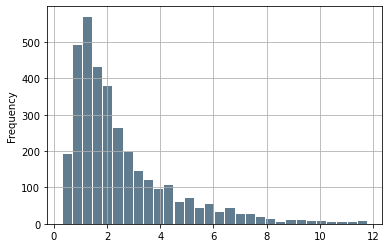

In [ ]:
import matplotlib.pyplot as plt

kw_attributes_performance['New Keyword Bid'].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

<BarContainer object of 3450 artists>

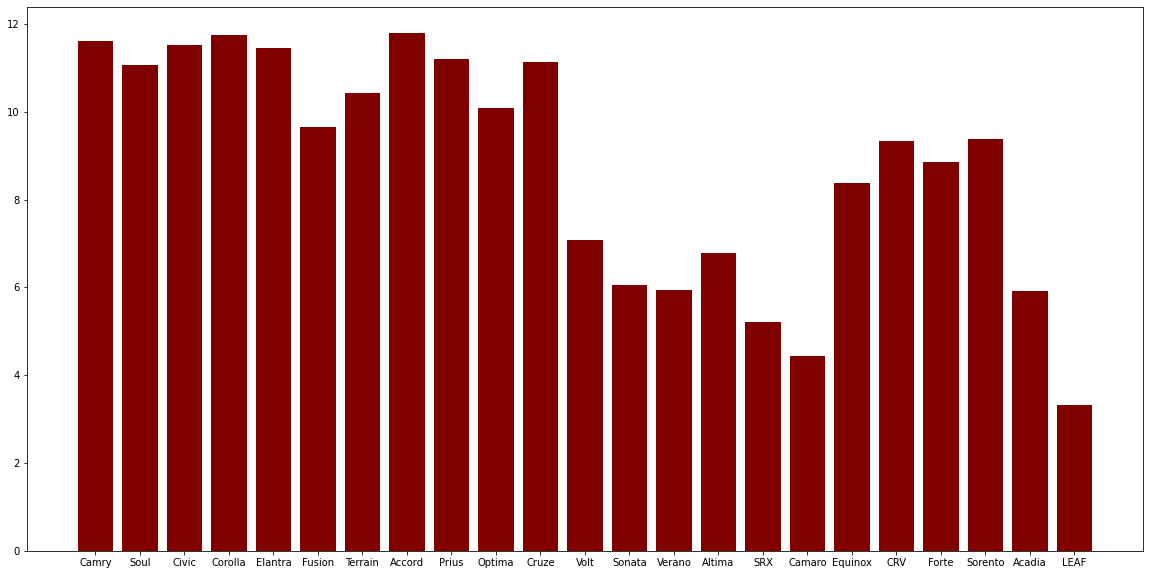

In [ ]:
fig = plt.figure(figsize = (20, 10))
plt.bar(kw_attributes_performance['Model'], kw_attributes_performance['New Keyword Bid'], color ='maroon')

In [ ]:
kw_attributes_performance.groupby(by=['Model'])['New Keyword Bid'].max()

Model
Acadia      5.913369
Accord     11.793866
Altima      6.782969
CRV         9.341570
Camaro      4.443931
Camry      11.613255
Civic      11.512376
Corolla    11.743401
Cruze      11.128254
Elantra    11.462466
Equinox     8.383492
Forte       8.866466
Fusion      9.645035
LEAF        3.318654
Optima     10.098273
Prius      11.201975
SRX         5.209476
Sonata      6.053132
Sorento     9.372870
Soul       11.058080
Terrain    10.437841
Verano      5.946141
Volt        7.073897
Name: New Keyword Bid, dtype: float64